In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import os

In [3]:
os.chdir("C:/Users/Lenovo/Desktop/python project/project 2")

In [4]:
#Reading Application train csv
data_df = pd.read_csv("app_train_df_subset_25000.csv")
print(data_df.shape)
print(data_df.head())

(25000, 122)
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                  

In [5]:
#We can see clearly its a class imbalance problem.
#As a general rule if more than 50% missing we may try to remove those columns in one of tries and even discuss with business for importance
#Now analyze missing value
mis_val = data_df.isnull().sum()
print(mis_val)
#writing the outcome to csv to analyze further
mis_val.to_csv('case1_app_train_df_subset_25000.csv')

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                  18
NAME_TYPE_SUITE                 103
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                   16528
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                  

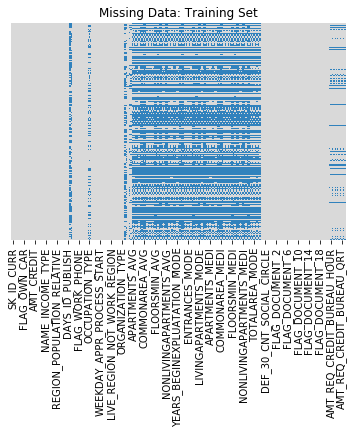

In [6]:
#finding missing data using heatmap
sns.heatmap(data_df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [7]:
data_df = data_df.rename(columns={'TARGET': 'default'})

Target Variable
default
0    23004
1     1996
Name: default, dtype: int64


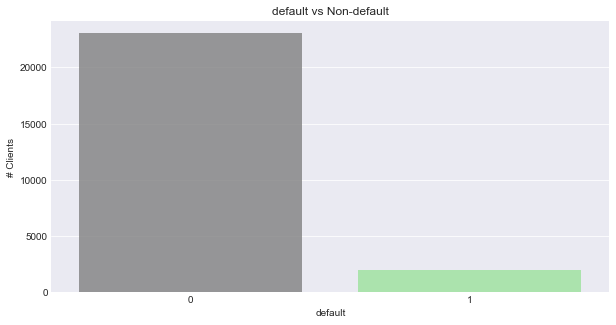

In [8]:
#Target Variable 'TARGET' is our target as that is the dependent variable we are trying to predict.
# TARGET Count
print('Target Variable')
print(data_df.groupby(['default']).default.count())
#Plotting target variable
# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
#Alpha is used for , it makes the bars semi-translucent. 
sns.countplot(data_df['default'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('default vs Non-default')
plt.ylabel('# Clients')
plt.show()

In [9]:
#It shows that it is a clear case of class imbalance
#Now we will analyze the types of Features( Categorical, Neumerical etc)
# Number of each type of column
print(data_df.dtypes.value_counts())
print('number of unique entries in each of the object (categorical) columns>>>>>>>>>>>>>')
# Number of unique classes in each object column
print(data_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))

float64    63
int64      43
object     16
dtype: int64
number of unique entries in each of the object (categorical) columns>>>>>>>>>>>>>
NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               6
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64


In [10]:
#Function for plotting Categorical columns with Target
def plot_categorical(df,attr1='',attr2=''):
    f,ax=plt.subplots(1,2,figsize=(15,6))
    df[[attr1,attr2]].groupby([attr1]).count().plot.bar(ax=ax[0],color='Green')
    ax[0].set_title('count of clients Based on'+attr1)
    sns.countplot(attr1,hue=attr2,data=df,ax=ax[1],palette="spring")
    ax[1].set_title(attr1+': Defaulter vs Non-Defaulter')
    # Rotate x-labels
    plt.xticks(rotation=-90)
    my_plot=plt.show()
    return my_plot

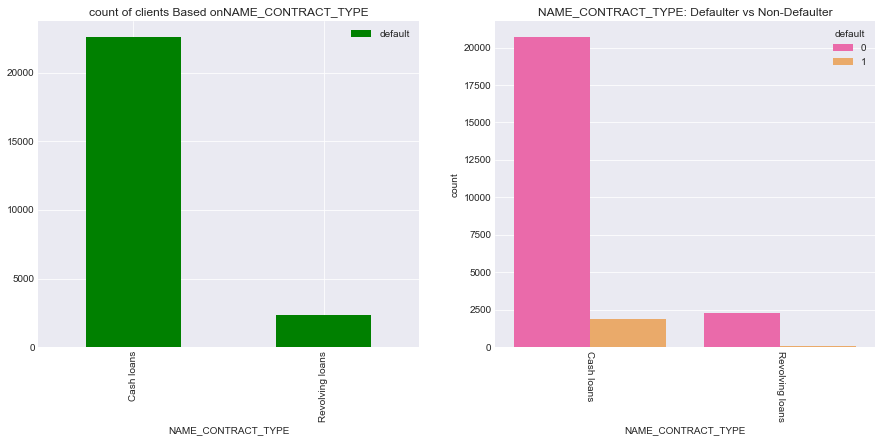

In [11]:
plot_categorical(data_df,'NAME_CONTRACT_TYPE','default')

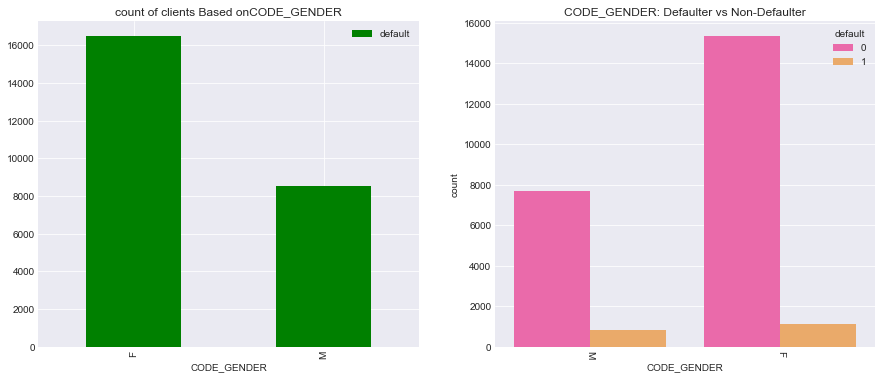

In [12]:
plot_categorical(data_df,'CODE_GENDER','default')

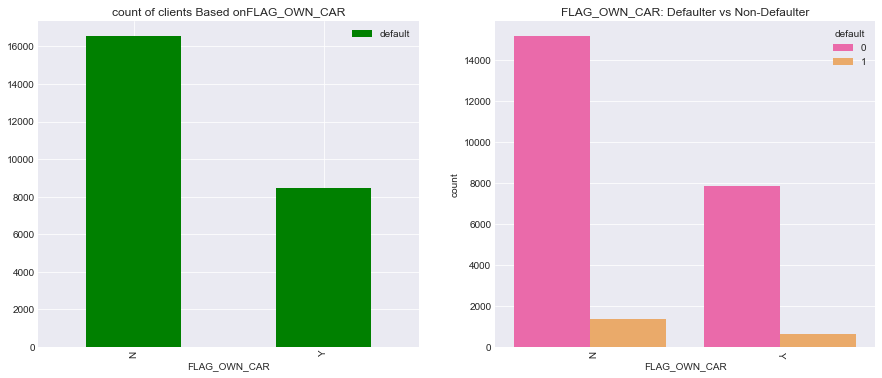

In [13]:
plot_categorical(data_df,'FLAG_OWN_CAR','default')

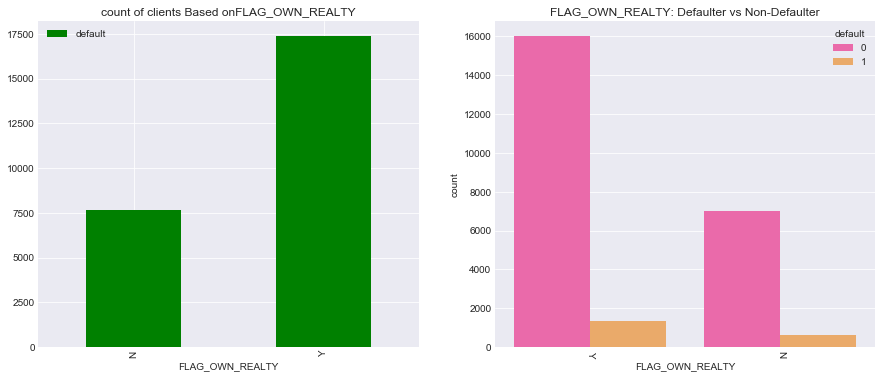

In [14]:
plot_categorical(data_df,'FLAG_OWN_REALTY','default')

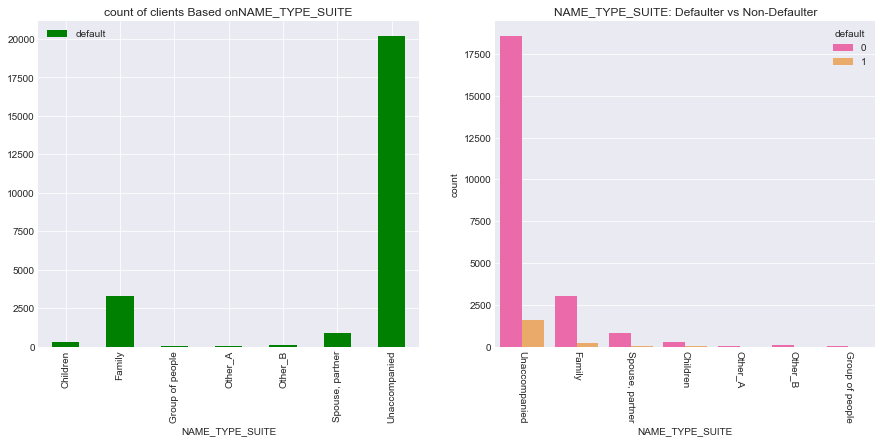

In [15]:
plot_categorical(data_df,'NAME_TYPE_SUITE','default')

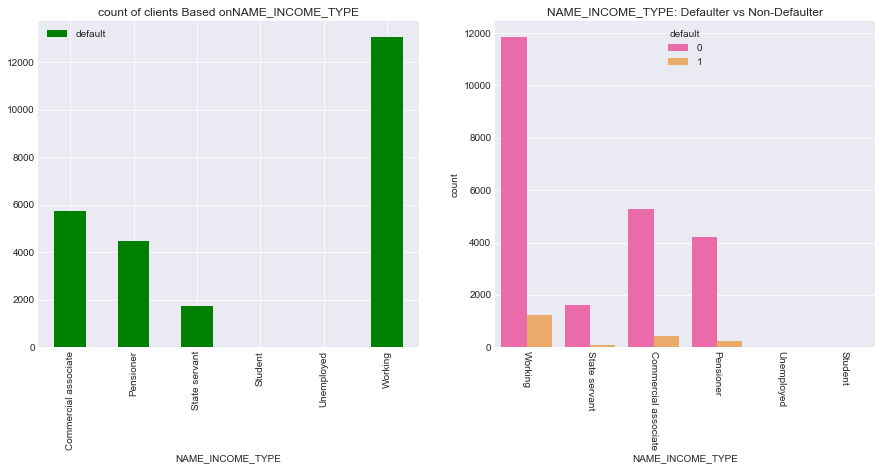

In [16]:
plot_categorical(data_df,'NAME_INCOME_TYPE','default')

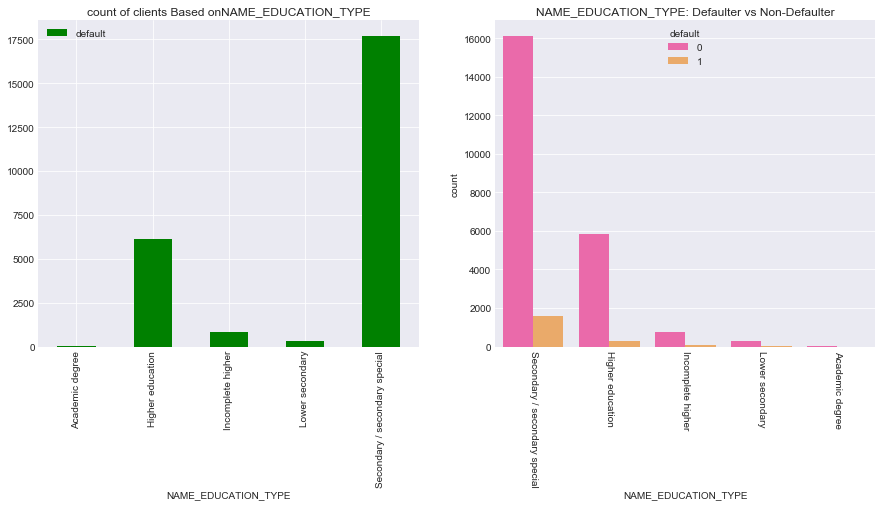

In [17]:
plot_categorical(data_df,'NAME_EDUCATION_TYPE','default')

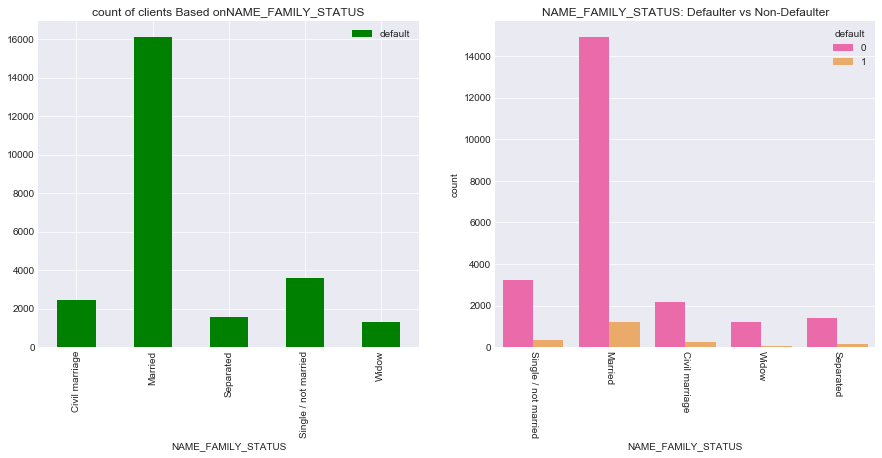

In [18]:
plot_categorical(data_df,'NAME_FAMILY_STATUS','default')

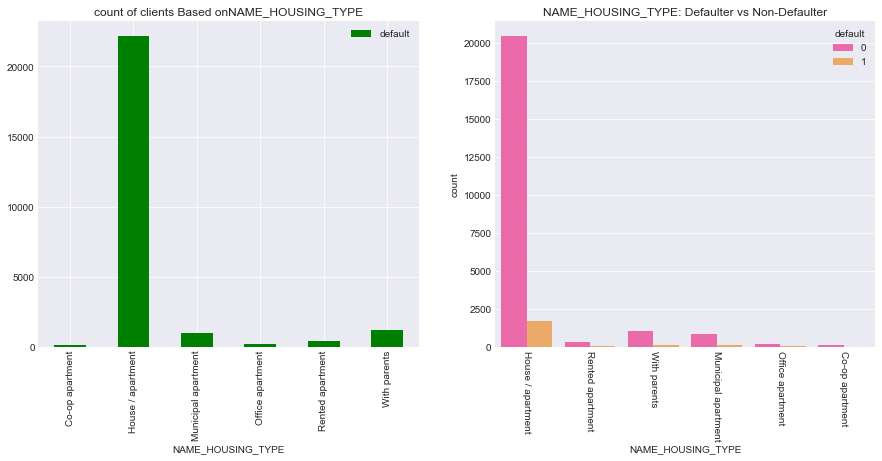

In [19]:
plot_categorical(data_df,'NAME_HOUSING_TYPE','default')

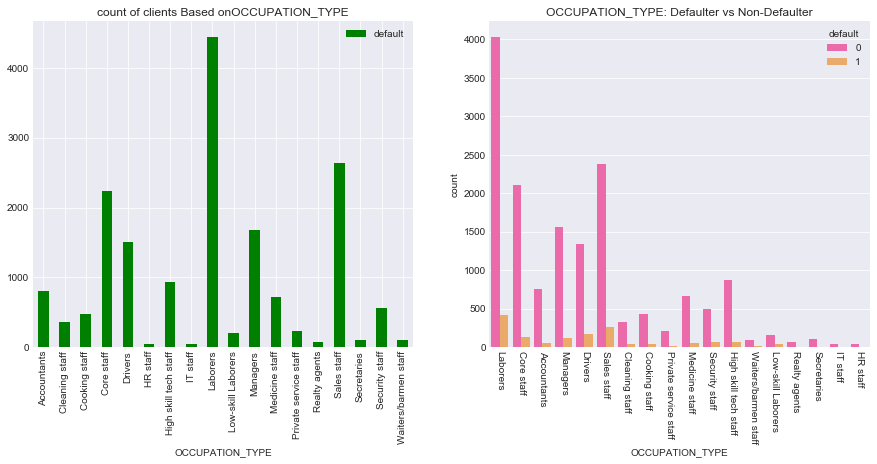

In [21]:
plot_categorical(data_df,'OCCUPATION_TYPE','default')

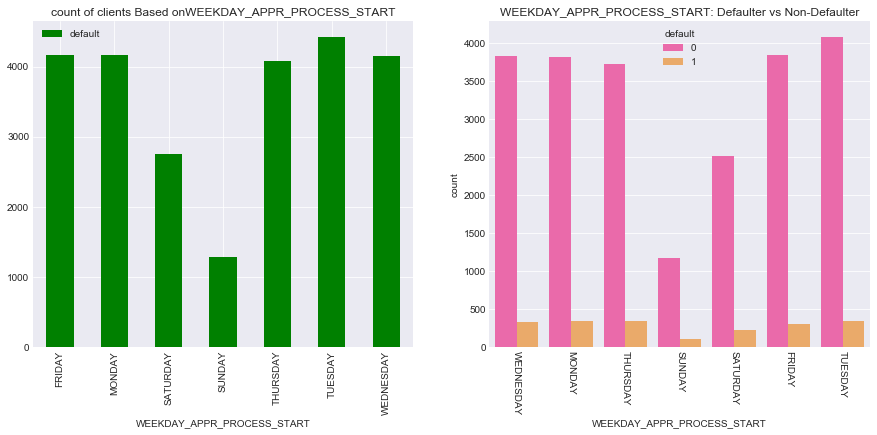

In [22]:
plot_categorical(data_df,'WEEKDAY_APPR_PROCESS_START','default')

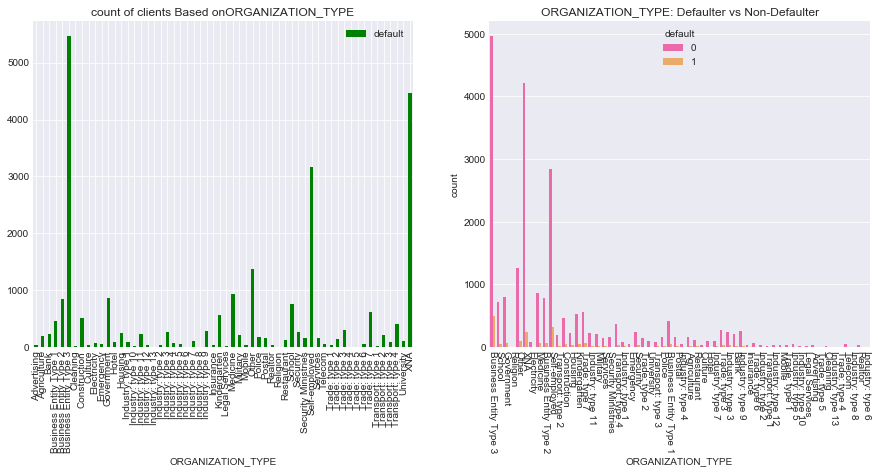

In [23]:
plot_categorical(data_df,'ORGANIZATION_TYPE','default')

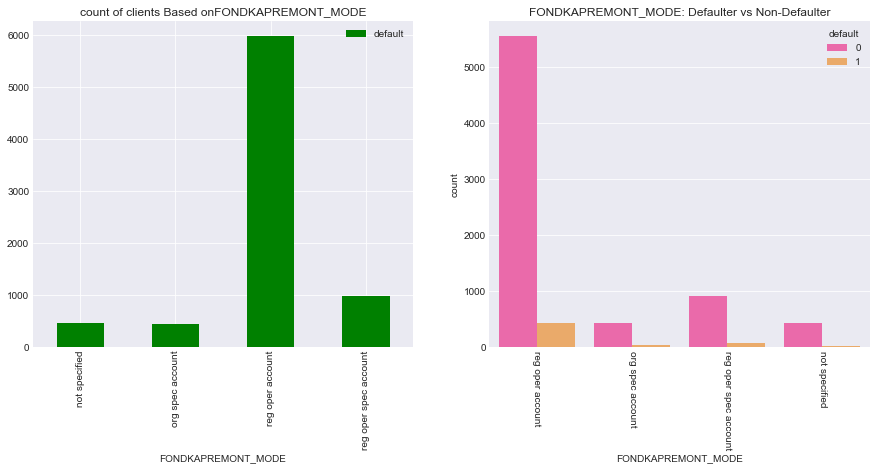

In [24]:
plot_categorical(data_df,'FONDKAPREMONT_MODE','default')

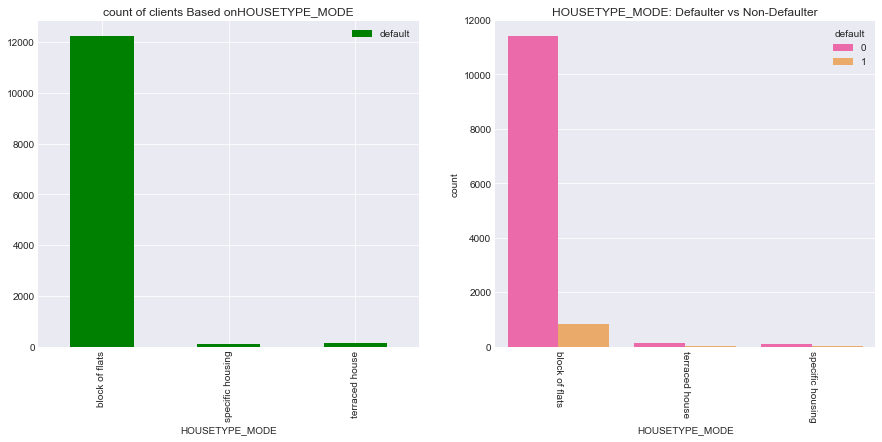

In [25]:
plot_categorical(data_df,'HOUSETYPE_MODE','default')

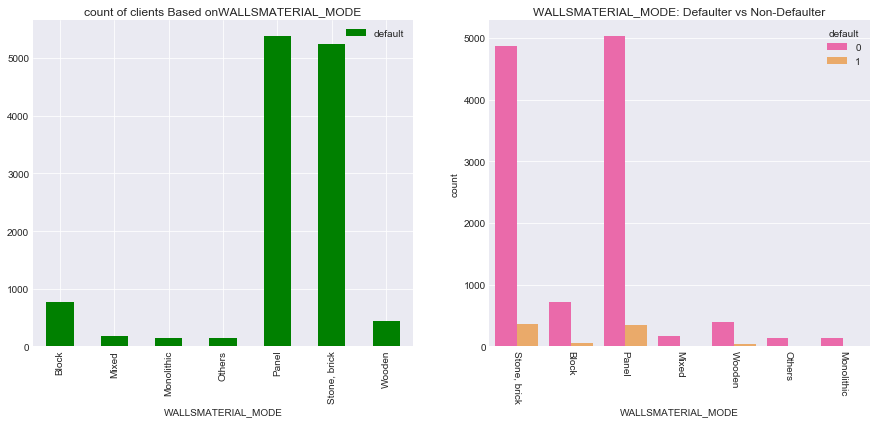

In [26]:
plot_categorical(data_df,'WALLSMATERIAL_MODE','default')

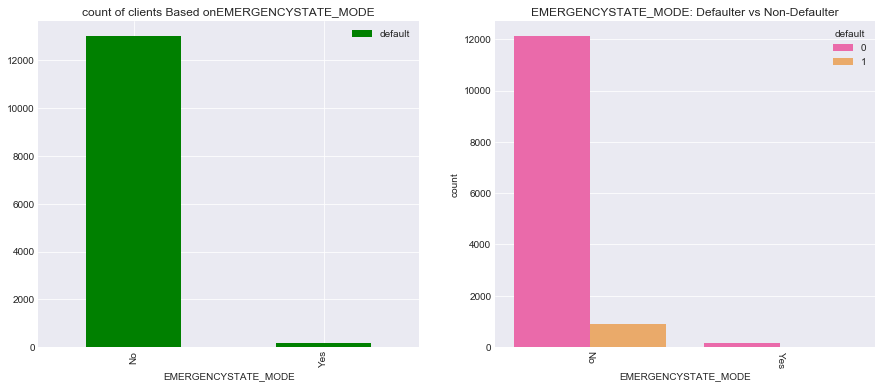

In [27]:
plot_categorical(data_df,'EMERGENCYSTATE_MODE','default')

In [28]:
#singles are slightly more defaulter than rest
#Let us analyse float64 columns
data_df.select_dtypes('float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'F

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'AMT_GOODS_PRICE Distribution')

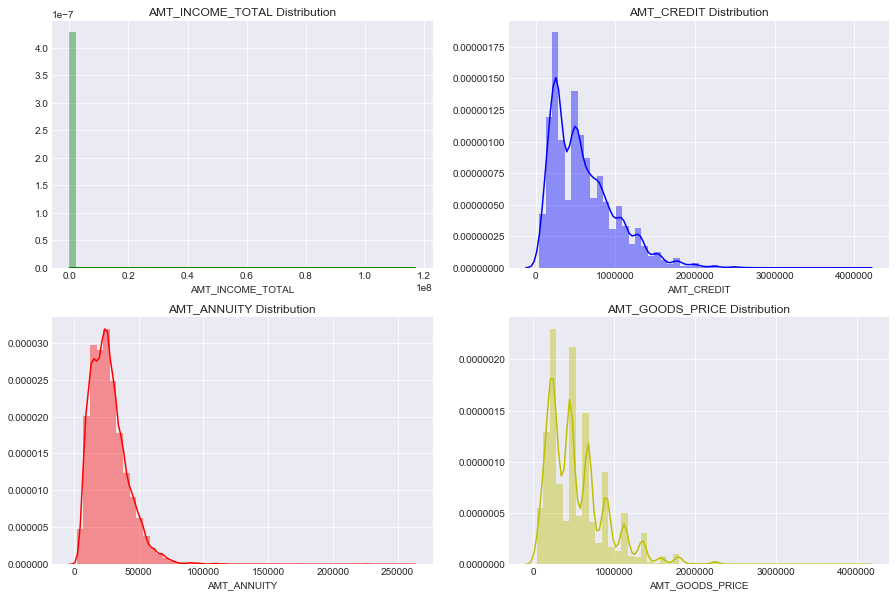

In [46]:
#dist plot a univariate distribution of observations. 
#The most common form of estimation is known as kernel density estimation(KDE).gaussian kernel density estimate
# Set up the matplotlib figure
f, ax = plt.subplots(2,2, figsize=(15, 10))


sns.distplot(data_df.AMT_INCOME_TOTAL.dropna(), kde=True, color="g", ax=ax[0,0]).set_title('AMT_INCOME_TOTAL Distribution')

sns.distplot(data_df.AMT_CREDIT.dropna(), kde=True, color="b", ax=ax[0,1]).set_title('AMT_CREDIT Distribution')

 
sns.distplot(data_df.AMT_ANNUITY.dropna(), kde=True, color="r", ax=ax[1,0]).set_title('AMT_ANNUITY Distribution')


sns.distplot(data_df.AMT_GOODS_PRICE.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('AMT_GOODS_PRICE Distribution')



C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'EXT_SOURCE_2 Distribution')

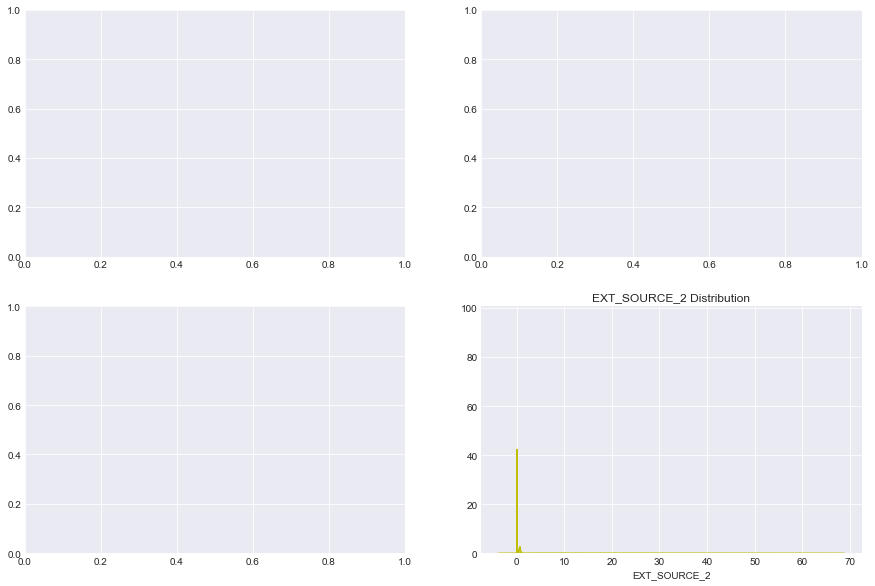

In [48]:
f, ax = plt.subplots(2,2, figsize=(15, 10))

sns.distplot(data_df.REGION_POPULATION_RELATIVE.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('REGION_POPULATION_RELATIVE Distribution')

sns.distplot(data_df.OWN_CAR_AGE.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('OWN_CAR_AGE Distribution')

sns.distplot(data_df.EXT_SOURCE_1.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('EXT_SOURCE_1 Distribution')

sns.distplot(data_df.EXT_SOURCE_2.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('EXT_SOURCE_2 Distribution')



C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'YEARS_BEGINEXPLUATATION_AVG Distribution')

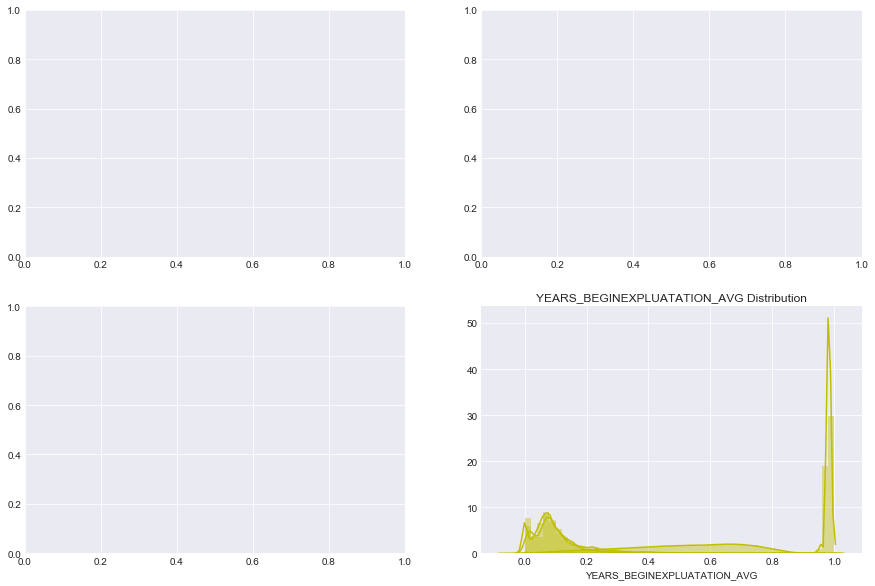

In [42]:
f, ax = plt.subplots(2,2, figsize=(15, 10))
sns.distplot(data_df.EXT_SOURCE_3.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('EXT_SOURCE_3 Distribution')

sns.distplot(data_df.APARTMENTS_AVG.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('APARTMENTS_AVG Distribution')

sns.distplot(data_df.BASEMENTAREA_AVG.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('BASEMENTAREA_AVG Distribution')

sns.distplot(data_df.YEARS_BEGINEXPLUATATION_AVG.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('YEARS_BEGINEXPLUATATION_AVG Distribution')

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'ENTRANCES_AVG Distribution')

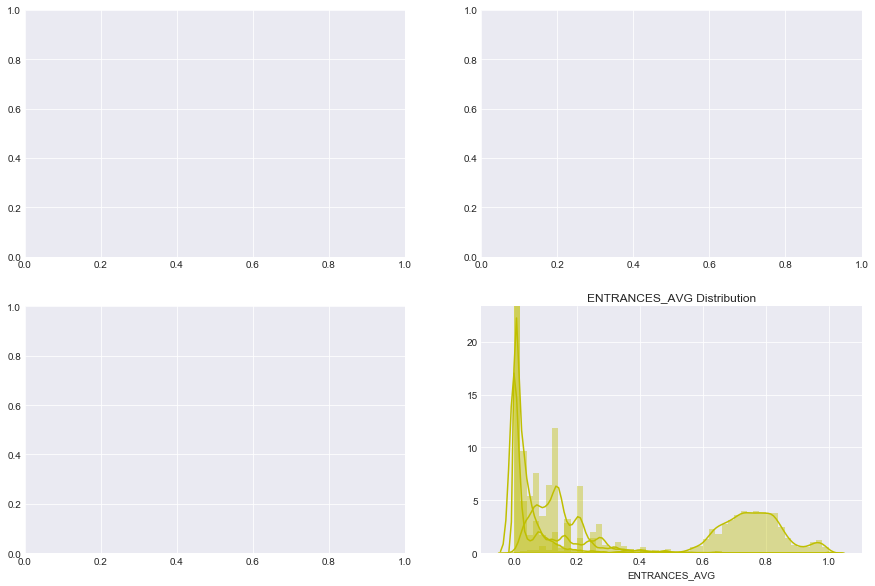

In [43]:
f, ax = plt.subplots(2,2, figsize=(15, 10))
sns.distplot(data_df.YEARS_BUILD_AVG.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('YEARS_BUILD_AVG Distribution')

sns.distplot(data_df.COMMONAREA_AVG.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('COMMONAREA_AVG Distribution')

sns.distplot(data_df.ELEVATORS_AVG.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('ELEVATORS_AVG Distribution')

sns.distplot(data_df.ENTRANCES_AVG.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('ENTRANCES_AVG Distribution')

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LIVINGAPARTMENTS_AVG Distribution')

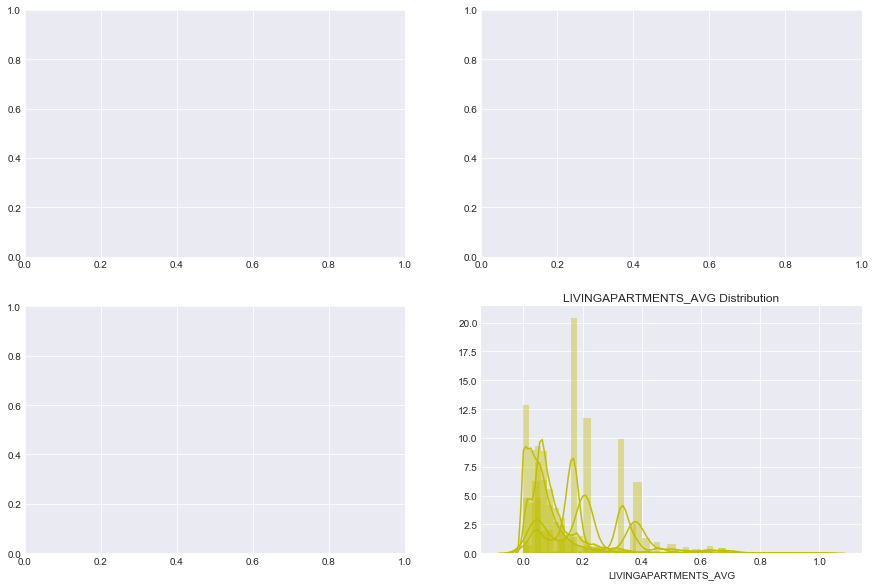

In [44]:
f, ax = plt.subplots(2,2, figsize=(15, 10))
sns.distplot(data_df.FLOORSMAX_AVG.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('FLOORSMAX_AVG Distribution')

sns.distplot(data_df.FLOORSMIN_AVG.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('FLOORSMIN_AVG Distribution')

sns.distplot(data_df.LANDAREA_AVG.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('LANDAREA_AVG Distribution')

sns.distplot(data_df.LIVINGAPARTMENTS_AVG.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('LIVINGAPARTMENTS_AVG Distribution')

In [40]:
#Let us analyse int64 columns
data_df.select_dtypes('int64').columns


Index(['SK_ID_CURR', 'default', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object'

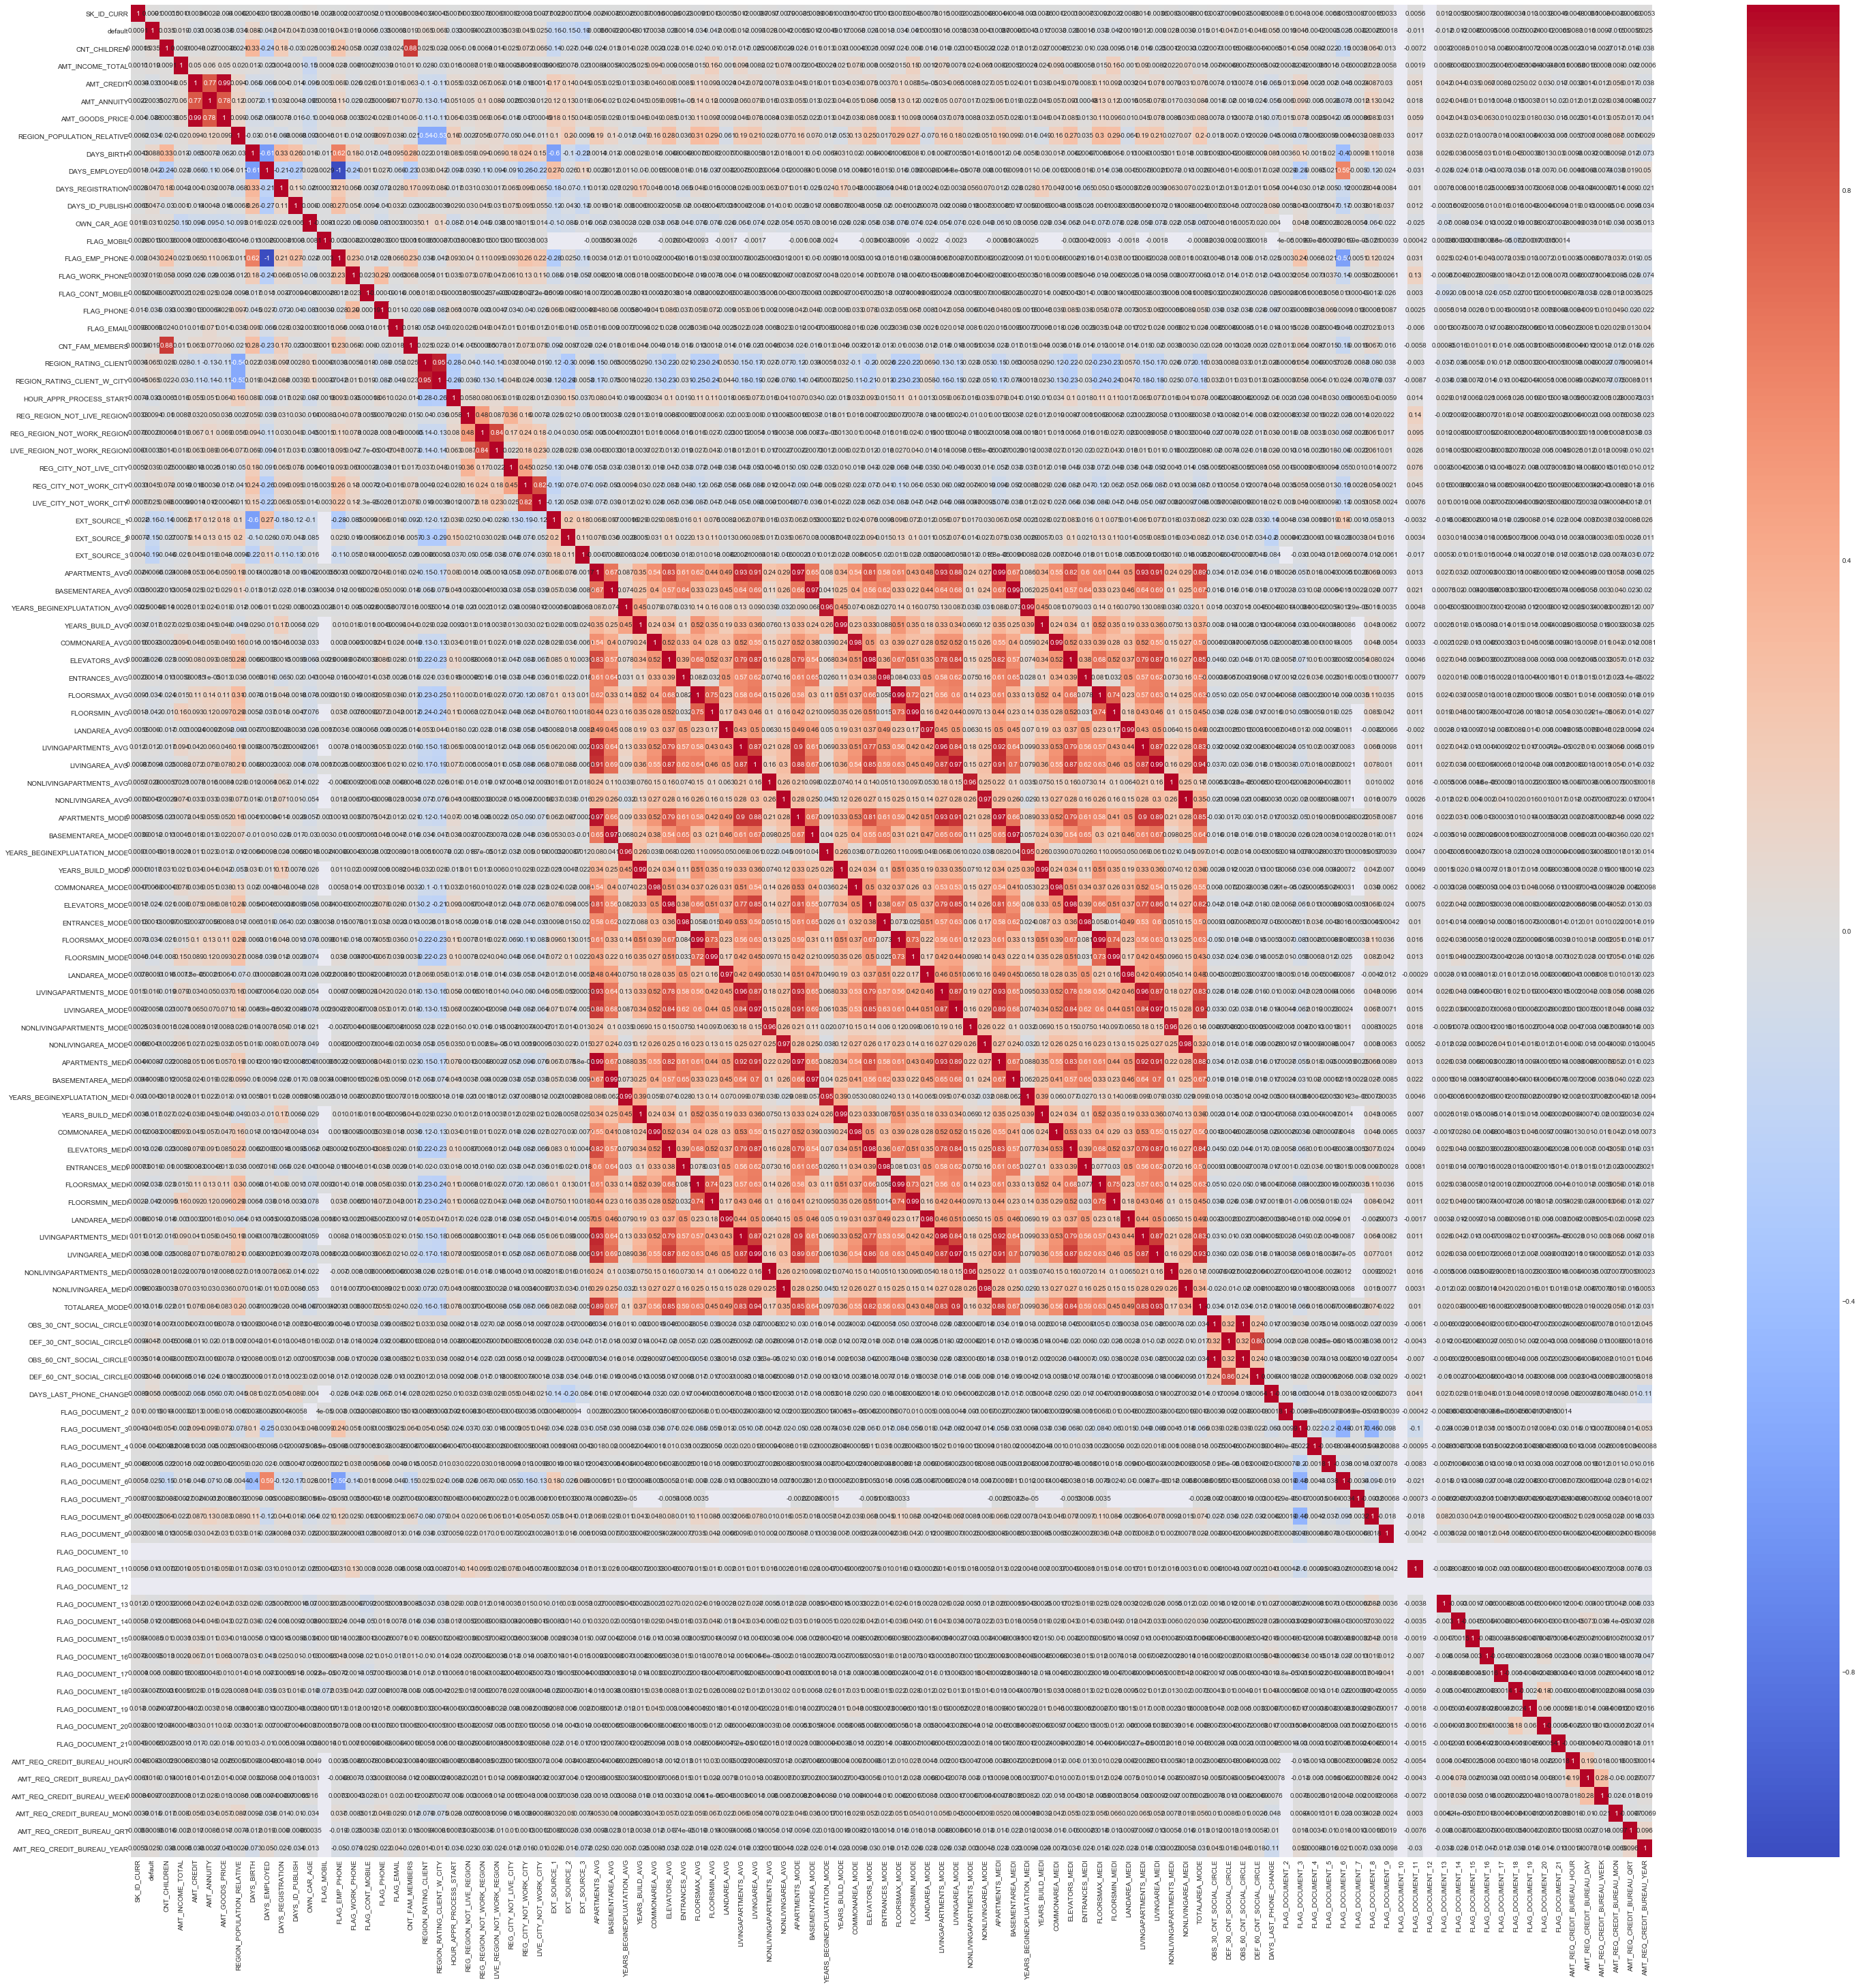

In [51]:
plt.figure(figsize=(50,50))
sns.heatmap(data_df.corr(),vmin=-1,cmap='coolwarm',annot=True);